<a href="https://colab.research.google.com/github/kunalsingh286/pandas-assignment/blob/main/dataAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q12. Create a random dataset of 100 rows and 30 columns. All the values are defined between [1,200]. Perform the following operations:
(i) Replace all the values with NA in the dataset defined between [10, 60]. Print the count of number rows having missing values.
(ii) Replace all the NA values with the average of the column value.
(iii) Find the Pearson correlation among all the columns and plot heat map. Also select those columns having correlation <=0.7.
(iv) Normalize all the values in the dataset between 0 and 10.
(v) Replace all the values in the dataset with 1 if value <=0.5 else with 0.

Number of rows with missing values: 100


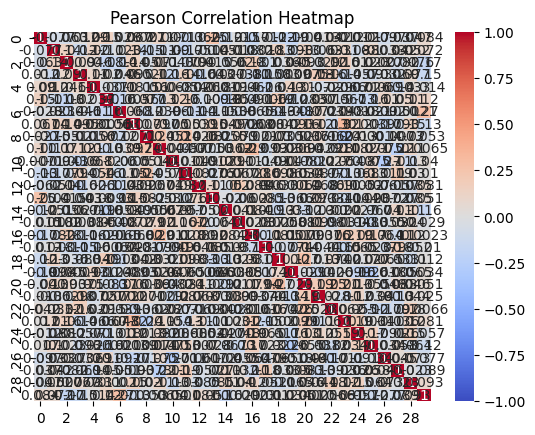

Columns with correlation <= 0.7:
Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
      dtype='int64')


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Create random dataset
df = pd.DataFrame(np.random.randint(1, 201, size=(100, 30)))

# Replace values between 10 and 60 with NA
df = df.applymap(lambda x: np.nan if 10 <= x <= 60 else x)

# Count rows with missing values
rows_with_missing = df.isnull().any(axis=1).sum()
print(f"Number of rows with missing values: {rows_with_missing}")

# Replace NA values with column averages
df.fillna(df.mean(), inplace=True)

# Calculate Pearson correlation
corr = df.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Heatmap')
plt.show()

# Select columns with correlation <= 0.7
selected_columns = corr.columns[(corr.abs() <= 0.7).any()]
print(f"Columns with correlation <= 0.7:\n{selected_columns}")

# Normalize values between 0 and 10
df = (df - df.min()) / (df.max() - df.min()) * 10

# Replace values with 1 if <= 0.5 else with 0
df = df.applymap(lambda x: 1 if x <= 0.5 else 0)


Q13. Create a random dataset of 500 rows and 10 columns.
Columns 1 to 4 are defined between [-10, 10];
Columns 5 to 8 are defined between [10, 20];
Columns 9 to 10 are defined between [-100, 100].
Apply following clustering algorithms; determine the optimal number of clusters and plot distance metric graph using each algorithm.
(i) K-Mean clustering
(ii) Hierarchical clustering

       col1      col2      col3      col4       col5       col6       col7  \
0 -2.509198  9.014286  4.639879  1.973170  12.617057  12.469788  19.062546   
1 -6.879627 -6.880110 -8.838328  7.323523  12.719497  17.593983  14.497398   
2  2.022300  4.161452 -9.588310  9.398197  10.653662  14.875712  10.336136   
3  6.648853 -5.753218 -6.363501 -6.331910  19.064375  11.392454  15.324207   
4 -3.915155  0.495129 -1.361100 -4.175417  13.473433  18.998333  10.218234   

        col8       col9      col10  
0  12.495462  14.399176  61.086466  
1  17.767106  52.032186 -69.220019  
2  10.626532 -70.150106 -46.365126  
3  14.110956 -27.785055 -18.308884  
4  16.637897  35.939443 -88.663914  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

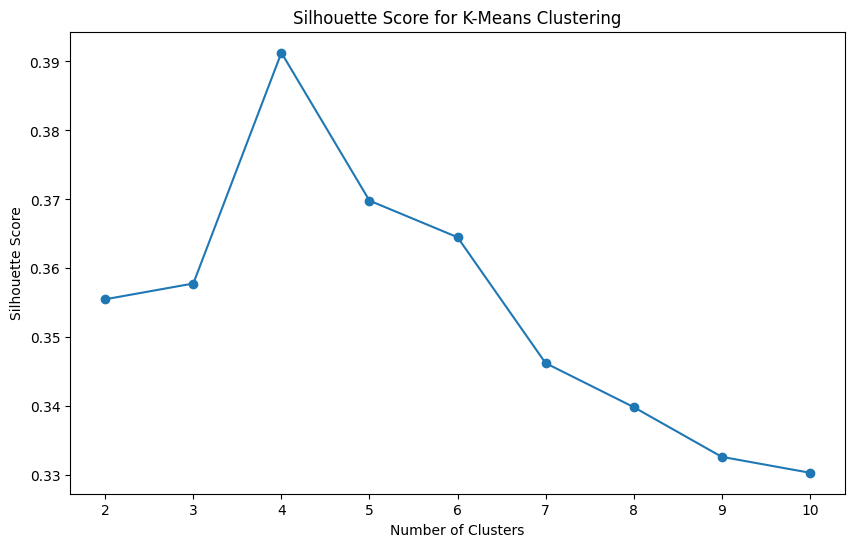

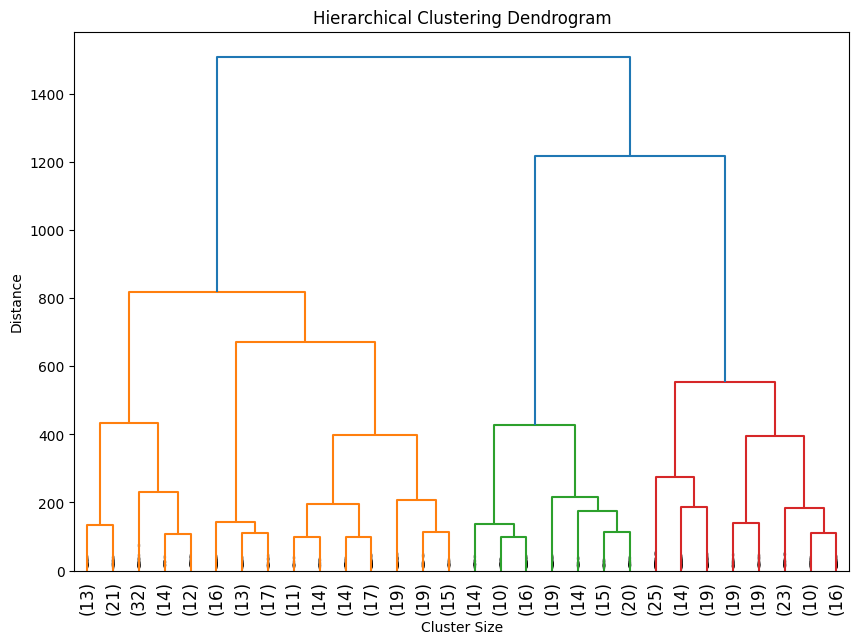

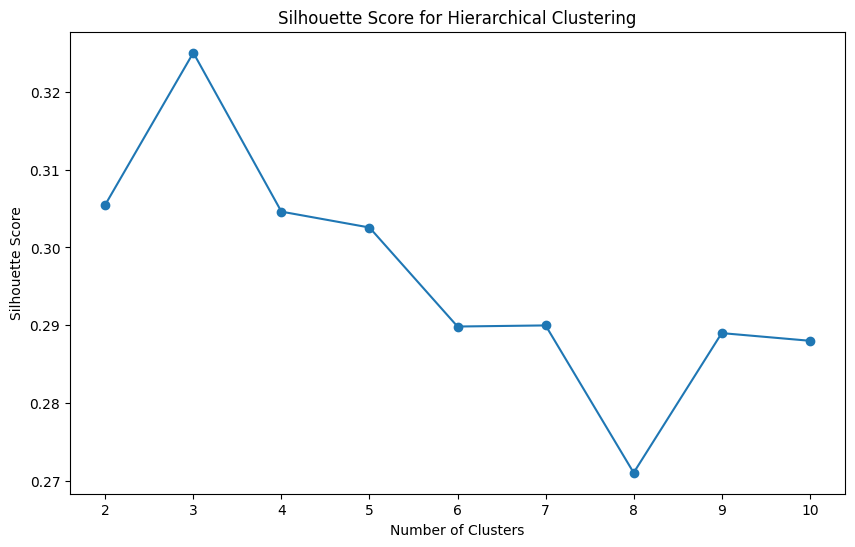

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Set seed for reproducibility
np.random.seed(42)

# Step 1: Create random dataset
data = np.hstack([
    np.random.uniform(-10, 10, size=(500, 4)),
    np.random.uniform(10, 20, size=(500, 4)),
    np.random.uniform(-100, 100, size=(500, 2))
])

df = pd.DataFrame(data, columns=[f'col{i+1}' for i in range(10)])
print(df.head())

# Step 2: K-Means Clustering
range_n_clusters = range(2, 11)
silhouette_avg = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(df, cluster_labels))

# Plot silhouette score
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.title('Silhouette Score for K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Step 3: Hierarchical Clustering
linked = linkage(df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

# Determine the optimal number of clusters using silhouette score
silhouette_avg = []
range_n_clusters = range(2, 11)

for num_clusters in range_n_clusters:
    cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')
    silhouette_avg.append(silhouette_score(df, cluster_labels))

# Plot silhouette score
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.title('Silhouette Score for Hierarchical Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


Q14. Create a random dataset of 600 rows and 15 columns. All the values are defined between [-100,100]. Perform the following operations:
(i) Plot scatter graph between Column 5 and Column 6.
(ii) Plot histogram of each column in single graph.
(iii) Plot the Box plot of each column in single graph.


        col1       col2       col3       col4       col5       col6  \
0 -25.091976  90.142861  46.398788  19.731697 -68.796272 -68.801096   
1 -63.319098 -39.151551   4.951286 -13.610996 -41.754172  22.370579   
2  21.508970 -65.895175 -86.989681  89.777107  93.126407  61.679470   
3  32.504457 -37.657785   4.013604   9.342056 -63.029109  93.916926   
4 -22.264542 -45.730194  65.747502 -28.649335 -43.813098   8.539217   

        col7       col8       col9      col10      col11      col12  \
0 -88.383278  73.235229  20.223002  41.614516 -95.883101  93.981970   
1 -72.101228 -41.571070 -26.727631  -8.786003  57.035192 -60.065244   
2 -39.077246 -80.465577  36.846605 -11.969501 -75.592353  -0.964618   
3  55.026565  87.899788  78.965470  19.579996  84.374847 -82.301500   
4 -71.815155  60.439396 -85.089871  97.377387  54.448954 -60.256864   

       col13      col14      col15  
0  66.488528 -57.532178 -63.635007  
1   2.846888  18.482914 -90.709917  
2 -93.122296  81.864080 -48.244004 

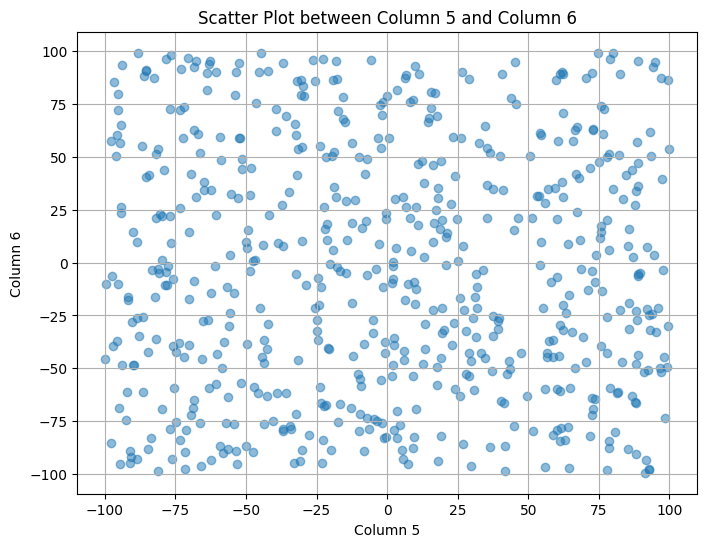

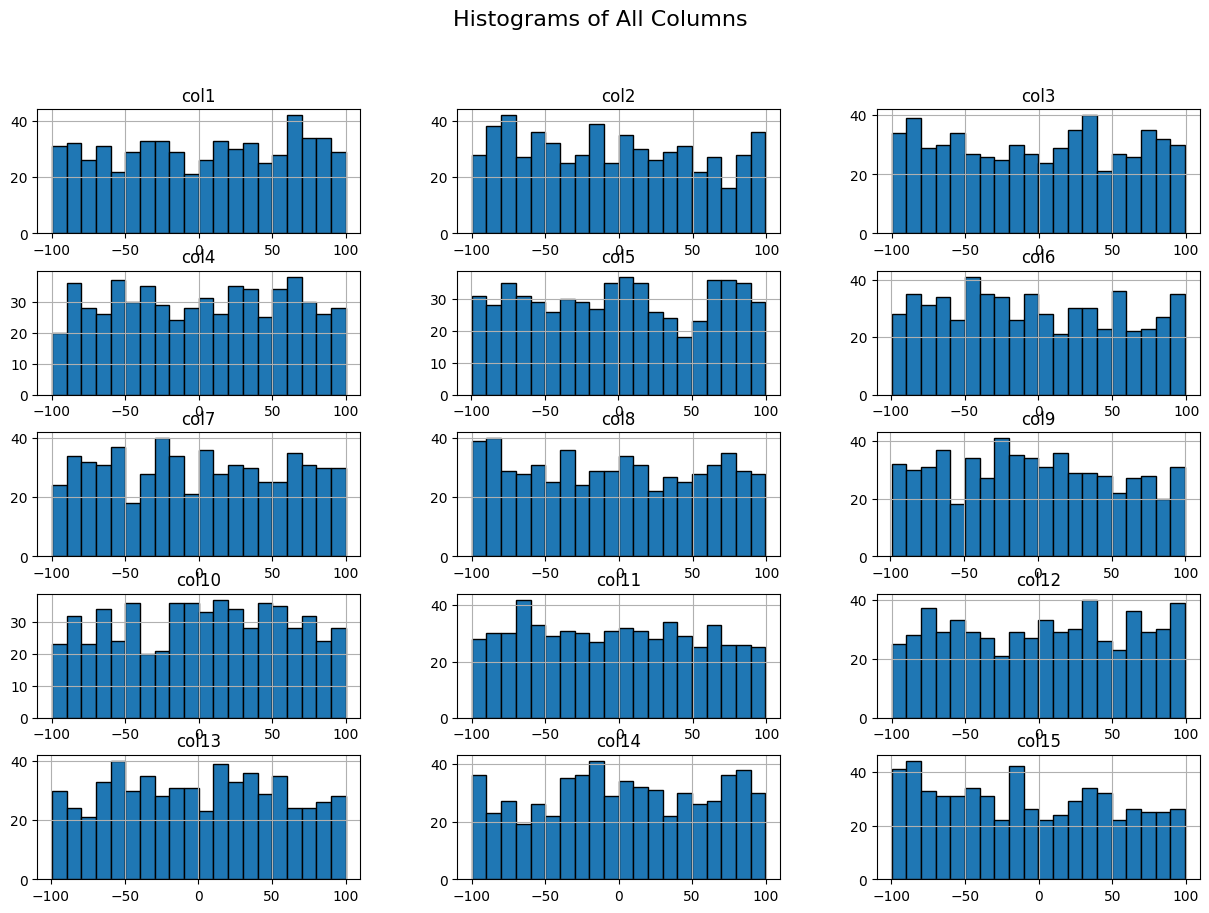

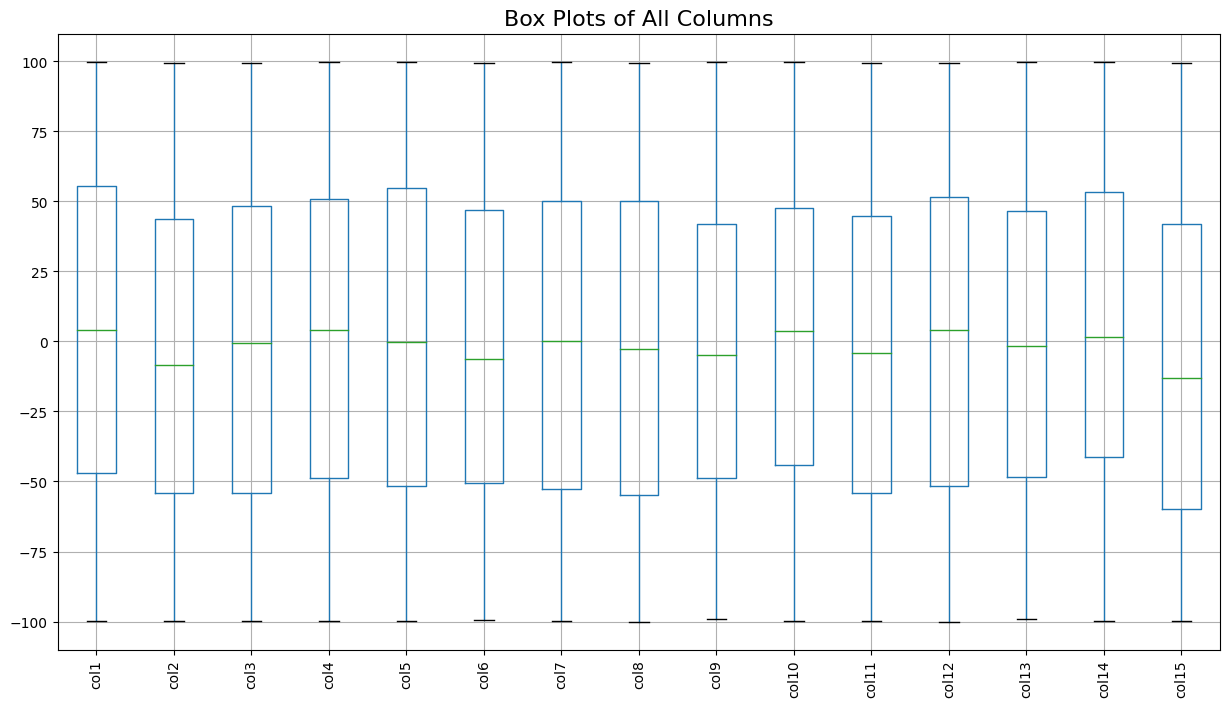

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Step 1: Create random dataset
data = np.random.uniform(-100, 100, size=(600, 15))
df = pd.DataFrame(data, columns=[f'col{i+1}' for i in range(15)])
print(df.head())

# Step 2: Plot scatter graph between Column 5 and Column 6
plt.figure(figsize=(8, 6))
plt.scatter(df['col5'], df['col6'], alpha=0.5)
plt.title('Scatter Plot between Column 5 and Column 6')
plt.xlabel('Column 5')
plt.ylabel('Column 6')
plt.grid(True)
plt.show()

# Step 3: Plot histogram of each column in a single graph
df.hist(bins=20, figsize=(15, 10), layout=(5, 3), edgecolor='black')
plt.suptitle('Histograms of All Columns', fontsize=16)
plt.show()

# Step 4: Plot the box plot of each column in a single graph
plt.figure(figsize=(15, 8))
df.boxplot()
plt.title('Box Plots of All Columns', fontsize=16)
plt.xticks(rotation=90)
plt.show()


Q15. Create a random dataset of 500 rows and 5 columns:
All the values are defined between [5,10].
Perform the following operations:
(i) Perform t-Test on each column.
(ii) Perform Wilcoxon Signed Rank Test on each column.
(iii) Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4

In [4]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, ranksums

# Set seed for reproducibility
np.random.seed(42)

# Step 1: Create random dataset
data = np.random.uniform(5, 10, size=(500, 5))
df = pd.DataFrame(data, columns=[f'col{i+1}' for i in range(5)])
print(df.head())

# Step 2: Perform t-Test on each column
t_test_results = {}
for column in df.columns:
    t_stat, p_value = ttest_1samp(df[column], 0)
    t_test_results[column] = (t_stat, p_value)

print("t-Test Results (t-statistic, p-value):")
for column, results in t_test_results.items():
    print(f"{column}: {results}")

# Step 3: Perform Wilcoxon Signed Rank Test on each column
wilcoxon_results = {}
for column in df.columns:
    stat, p_value = wilcoxon(df[column] - 0)
    wilcoxon_results[column] = (stat, p_value)

print("Wilcoxon Signed Rank Test Results (statistic, p-value):")
for column, results in wilcoxon_results.items():
    print(f"{column}: {results}")

# Step 4: Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4
t_stat, p_value = ttest_ind(df['col3'], df['col4'])
print(f"Two Sample t-Test between Column 3 and Column 4: (t-statistic: {t_stat}, p-value: {p_value})")

stat, p_value = ranksums(df['col3'], df['col4'])
print(f"Wilcoxon Rank Sum Test between Column 3 and Column 4: (statistic: {stat}, p-value: {p_value})")


       col1      col2      col3      col4      col5
0  6.872701  9.753572  8.659970  7.993292  5.780093
1  5.779973  5.290418  9.330881  8.005575  8.540363
2  5.102922  9.849549  9.162213  6.061696  5.909125
3  5.917023  6.521211  7.623782  7.159725  6.456146
4  8.059264  5.697469  6.460723  6.831809  7.280350
t-Test Results (t-statistic, p-value):
col1: (113.42937413347687, 0.0)
col2: (113.28032276327413, 0.0)
col3: (118.61288302981465, 0.0)
col4: (115.71102402094046, 0.0)
col5: (114.93271573336857, 0.0)
Wilcoxon Signed Rank Test Results (statistic, p-value):
col1: (0.0, 1.2647189486921487e-83)
col2: (0.0, 1.2647189486921487e-83)
col3: (0.0, 1.2647189486921487e-83)
col4: (0.0, 1.2647189486921487e-83)
col5: (0.0, 1.2647189486921487e-83)
Two Sample t-Test between Column 3 and Column 4: (t-statistic: 0.09986315345227309, p-value: 0.9204730253478132)
Wilcoxon Rank Sum Test between Column 3 and Column 4: (statistic: 0.1191248809558157, p-value: 0.905176418944118)
